Aprendizaje No supervizado: PCA


A menudo, el objetivo deseado es reducir las dimensiones de un conjunto de datos $d$ dimensional proyectándolo en un subespacio de $k$ dimensiones ($k<d$) para aumentar la eficiencia computacional mientras se conserva la mayor parte de la información. 

**Obj de PCA:** Reducir las dimensiones de un conjunto de datos a una dimensión menor

Una pregunta importante que hay que hacer es 

- ¿Pero, como saber cuál es el tamaño de  𝑘  que representa la mayor información de nuestros datos?

### Algoritmo

1.- Obtener la matriz de covarianza

2.- Obtener los valores y vectores propios de la matriz covarianza

3.- Realizar una transformación de datos del espacio original al espacion con una dimensión menor

### Resumen de PCA

- Estandarizar los datos
- Obtener la matriz de covarianzas
- Obtener los valores y vectores propios de la matriz de covarianzas
- Ordenar los valores y vectores propios de manera descendente y escoger los k vectores propios que corresponden a los k valores propios más grandes donde k es la dimesion del nuevo espacio 
- Contruir la matriz de transformación $T$
- Realizar la transformación del conjunto de datos $X$ con $T$ para obtener un conjunto de datos $X_{new}$ en un espacio con menor dimensión

#### ¿Por qué PCA es útil en el aprendizaje automático?, aquí está la lista de los 3 beneficios principales:

- Reduce el tiempo de entrenamiento, debido a un conjunto de datos más pequeño.

- Elimina el ruido, manteniendo solo lo relevante.

- Hace posible la visualización, en los casos en los que se tiene un máximo de 3 componentes principales.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = np.array([[2.5,2.4],
                 [0.5,0.6],
                 [3.0,3.1],
                 [2.5,2.2],
                 [1.5,1.2],
                 [0.2,0.4],
                 [4.5,4.7],
                 [1.7,1.2],
                 [3.7,3.8],
                 [2.1,1.9]])

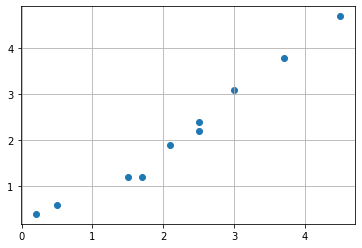

In [4]:
plt.figure(figsize=(6,4))
plt.scatter(data[:,0], data[:,1])
plt.grid()
plt.show()

### 1.- Estandarizar los datos

$$z = \frac{x -\bar{x}}{\sigma}$$

In [5]:
medias = data.mean(axis=0)
varian = data.std(axis=0)
data_std = (data - medias)/varian
data_std

array([[ 0.22138711,  0.18884739],
       [-1.3599494 , -1.17085384],
       [ 0.61672124,  0.7176201 ],
       [ 0.22138711,  0.03776948],
       [-0.56928114, -0.7176201 ],
       [-1.59714987, -1.32193176],
       [ 1.80272362,  1.92624342],
       [-0.41114749, -0.7176201 ],
       [ 1.17018902,  1.2463928 ],
       [-0.09488019, -0.18884739]])

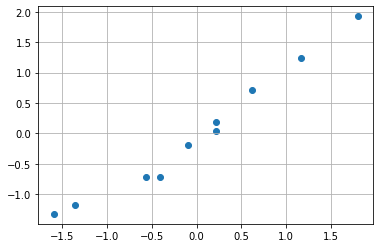

In [6]:
plt.figure(figsize=(6,4))
plt.scatter(data_std[:,0], data_std[:,1])
plt.grid()
plt.show()

### 2.-  Obtener la matriz de covarianzas

In [7]:
data_cov = np.cov(data_std.transpose())
data_cov

array([[1.11111111, 1.09431773],
       [1.09431773, 1.11111111]])

### 3.- Obtener los valores y vectores propios de la matriz de covarianzas

### Repaso:

#### Valores propios
$det(\lambda I - A) = 0$

Para encontrar los valores propios veamos un ejemplo:

$$A=\begin{bmatrix} 4 &  1\\ -6 & -3 \end{bmatrix}$$

$$ I=\begin{bmatrix} 1 &  0\\ 0 & 1 \end{bmatrix}$$
$$\lambda I - A= \begin{bmatrix} \lambda - 4 &  -1\\ 6 & \lambda + 3 \end{bmatrix} $$

$$det(\lambda I - A)= (\lambda -4)(\lambda + 3) + 6 = \lambda^2 -\lambda -12 + 6= \lambda^2 - \lambda - 6 = 0 $$

$$ \lambda_1 = 3$$
$$ \lambda_2 = -2$$

In [8]:
# w - valores propios
# v - vectores propios

w,v = np.linalg.eig(data_cov)

In [9]:
w

array([2.20542884, 0.01679338])

In [10]:
v

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

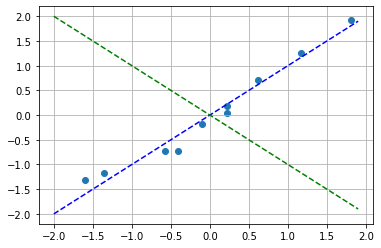

In [11]:
x=np.arange(-2,2,0.1)
plt.figure(figsize=(6,4))
plt.scatter(data_std[:,0], data_std[:,1])
plt.plot(x, (v[1,0]/v[0,0])*x, 'b--')
plt.plot(x, (v[1,1]/v[0,1])*x, 'g--')
plt.grid()
plt.show()

### 4.- Ordenar los vectores propios y valores propios y obtener la matriz de tansformación

In [12]:
w

array([2.20542884, 0.01679338])

In [13]:
np.sort(w)[::-1]

array([2.20542884, 0.01679338])

In [14]:
componente = w[[0,1]]
componente

array([2.20542884, 0.01679338])

In [15]:
M_trans = v[:,[0,1]]
M_trans

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [16]:
data_new = np.array(np.matrix(data_std)*np.matrix(M_trans))
data_new

array([[ 0.2900796 , -0.02300906],
       [-1.78954813,  0.13371075],
       [ 0.94352181,  0.07134627],
       [ 0.18325138, -0.12983727],
       [-0.90997659, -0.10489148],
       [-2.06410242,  0.1946086 ],
       [ 2.63677788,  0.08734168],
       [-0.79815922, -0.21670886],
       [ 1.70878139,  0.05388421],
       [-0.2006257 , -0.06644485]])

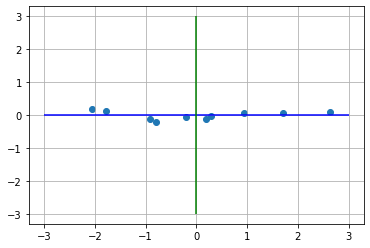

In [17]:
x=np.arange(-2,2,0.1)
plt.figure(figsize=(6,4))
plt.scatter(data_new[:,0], data_new[:,1])
plt.hlines(0,-3,3, 'b')
plt.vlines(0,-3,3, 'g')
plt.grid()
plt.show()

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=1)
pca.fit(data_std)
data_new_pca = pca.transform(data_std)

In [20]:
data_new_pca

array([[ 0.2900796 ],
       [-1.78954813],
       [ 0.94352181],
       [ 0.18325138],
       [-0.90997659],
       [-2.06410242],
       [ 2.63677788],
       [-0.79815922],
       [ 1.70878139],
       [-0.2006257 ]])

In [21]:
pca.explained_variance_

array([2.20542884])

In [22]:
w

array([2.20542884, 0.01679338])

In [23]:
pca = PCA(n_components=2)
pca.fit(data_std)
data_new_pca = pca.transform(data_std)
data_new_pca

array([[ 0.2900796 ,  0.02300906],
       [-1.78954813, -0.13371075],
       [ 0.94352181, -0.07134627],
       [ 0.18325138,  0.12983727],
       [-0.90997659,  0.10489148],
       [-2.06410242, -0.1946086 ],
       [ 2.63677788, -0.08734168],
       [-0.79815922,  0.21670886],
       [ 1.70878139, -0.05388421],
       [-0.2006257 ,  0.06644485]])

In [24]:
pca.explained_variance_

array([2.20542884, 0.01679338])

In [25]:
import matplotlib.image as mpimg

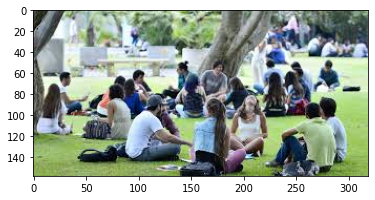

In [27]:
img = mpimg.imread('../Extra/Data/images.png')
plt.imshow(img)

In [28]:
img

array([[[0.45490196, 0.45882353, 0.43529412, 1.        ],
        [0.36078432, 0.3647059 , 0.33333334, 1.        ],
        [0.2509804 , 0.25490198, 0.22352941, 1.        ],
        ...,
        [0.41568628, 0.5372549 , 0.3764706 , 1.        ],
        [0.4862745 , 0.60784316, 0.44313726, 1.        ],
        [0.5647059 , 0.6862745 , 0.5137255 , 1.        ]],

       [[0.45490196, 0.45882353, 0.43529412, 1.        ],
        [0.3372549 , 0.34117648, 0.30980393, 1.        ],
        [0.29803923, 0.30588236, 0.2627451 , 1.        ],
        ...,
        [0.5294118 , 0.6509804 , 0.49019608, 1.        ],
        [0.57254905, 0.69411767, 0.5294118 , 1.        ],
        [0.6156863 , 0.7372549 , 0.57254905, 1.        ]],

       [[0.46666667, 0.47058824, 0.4392157 , 1.        ],
        [0.2784314 , 0.28235295, 0.2509804 , 1.        ],
        [0.2784314 , 0.28627452, 0.24313726, 1.        ],
        ...,
        [0.5294118 , 0.63529414, 0.49803922, 1.        ],
        [0.52156866, 0.631372

In [30]:
img.shape

(158, 319, 4)

In [33]:
d = img.shape
img_col = np.reshape(img,(d[0]*d[1], d[2]))
img_col

array([[0.45490196, 0.45882353, 0.43529412, 1.        ],
       [0.36078432, 0.3647059 , 0.33333334, 1.        ],
       [0.2509804 , 0.25490198, 0.22352941, 1.        ],
       ...,
       [0.5686275 , 0.7058824 , 0.38431373, 1.        ],
       [0.5686275 , 0.7058824 , 0.38431373, 1.        ],
       [0.5686275 , 0.7058824 , 0.38431373, 1.        ]], dtype=float32)

In [34]:
img_col.shape

(50402, 4)

In [35]:
# Análisis de PCA
medias = img_col.mean(axis=0)
img_m = img_col-medias

# Calculando la matriz de covarianzas
img_cov = np.cov(img_m.transpose())

# Clcular los valores y vectores propios
w,v = np.linalg.eig(img_cov)

porcentaje = w/np.sum(w)

In [36]:
porcentaje

array([0.93780452, 0.00802653, 0.05416894, 0.        ])

In [37]:
# Reducir los datos a una sóla dimensión
componentes = w[0:1]
M_trans = v[:,0:1]

#Transformación de los datos a una dimensión
img_new = np.matrix(img_m)*np.matrix(M_trans)
img_new

matrix([[ 0.14867747],
        [ 0.31584895],
        [ 0.50586233],
        ...,
        [-0.03890111],
        [-0.03890111],
        [-0.03890111]])

In [39]:
img_rec = np.matrix(img_new)*np.matrix(M_trans.transpose())
img_rec = img_rec+ medias

In [40]:
img_r = img.copy()
img_r[:,:,0]= img_rec[:,0].reshape((d[0],d[1]))
img_r[:,:,1]= img_rec[:,1].reshape((d[0],d[1]))
img_r[:,:,2]= img_rec[:,2].reshape((d[0],d[1]))
img_r[:,:,3]= img_rec[:,3].reshape((d[0],d[1]))

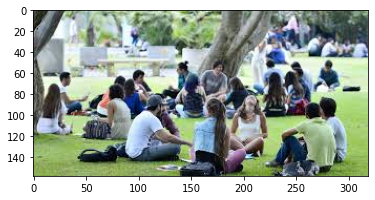

In [41]:
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


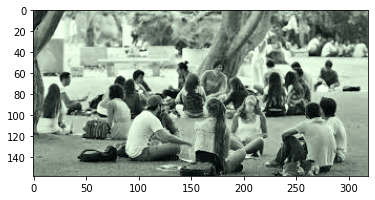

In [42]:
plt.imshow(img_r)